In [1]:
import numpy as np
import pandas as pd


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Inputs: 'X' and 'y'

In [3]:
data = pd.read_csv('Truncated_noOutliers.csv')

In [4]:
data.head()

,Tone,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.000,300.000,330.000
1,1,273.35,291.57,291.57,291.57,291.57,291.57,273.35,18.223,18.223,18.223
2,1,270.00,292.50,270.00,292.50,292.50,270.00,247.50,292.500,225.000,270.000
3,1,298.26,276.96,276.96,276.96,276.96,234.35,276.96,276.960,21.304,21.304
4,1,287.61,287.61,287.61,287.61,287.61,287.61,287.61,263.640,23.967,23.967


In [5]:
y = data["Tone"]

In [6]:
print(y.shape)

(965,)


In [13]:
X_data = data.drop(['Tone'],axis=1)
X_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,300.00,300.00,300.00,300.00,300.00,300.00,300.00,300.000,300.000,330.000
1,273.35,291.57,291.57,291.57,291.57,291.57,273.35,18.223,18.223,18.223
2,270.00,292.50,270.00,292.50,292.50,270.00,247.50,292.500,225.000,270.000
3,298.26,276.96,276.96,276.96,276.96,234.35,276.96,276.960,21.304,21.304
4,287.61,287.61,287.61,287.61,287.61,287.61,287.61,263.640,23.967,23.967


In [14]:
X = X_data.as_matrix()
print(X[:10])

[[ 300.     300.     300.     300.     300.     300.     300.     300.
   300.     330.   ]
 [ 273.35   291.57   291.57   291.57   291.57   291.57   273.35    18.223
    18.223   18.223]
 [ 270.     292.5    270.     292.5    292.5    270.     247.5    292.5
   225.     270.   ]
 [ 298.26   276.96   276.96   276.96   276.96   234.35   276.96   276.96
    21.304   21.304]
 [ 287.61   287.61   287.61   287.61   287.61   287.61   287.61   263.64
    23.967   23.967]
 [  25.64   307.67   307.67   307.67   307.67   307.67   307.67   307.67
   307.67   282.03 ]
 [  21.724  304.14   304.14   304.14    21.724   21.724   21.724   21.724
    21.724    0.   ]
 [ 300.16   300.16   277.07   277.07   253.98   253.98   230.89   300.16
   207.8    207.8  ]
 [ 298.26   298.26   298.26   276.96   255.65   234.35   255.65   234.35
   255.65   234.35 ]
 [ 282.99   282.99   282.99   282.99   282.99   282.99   259.41   259.41
   282.99   282.99 ]]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(772, 10)
(193, 10)
(772,)
(193,)


In [19]:
# set up pipeline
rbf_kernel_svm = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel = 'rbf', gamma = 0.125, C = 32))
    ))

In [20]:
# fit model to data:
rbf_kernel_svm.fit(X_train, y_train)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

In [21]:
y_predict = rbf_kernel_svm.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy score:', accuracy_score(y_test, y_predict))

Accuracy score: 0.865284974093


# Saving the model

In [23]:
import pickle

In [24]:
filename = 'okmodel.sav'
pickle.dump(rbf_kernel_svm, open(filename, 'wb'))

### Loading the model

In [25]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.865284974093


Old notes:
* Tests on sample data
* Grid search (paper says: ' After grid search for the parameter C and gamma, we get the best results when C is set to 32 and gamma is set to 0.125. The best model produces the recognition accuracy 74.75% which is slightly better than best result of one-hidden-layer MLP.')
* Confusion matrix

In [20]:
# grid search
gammas = [0.05, 0.1, 0.5]
Cs = [0.5, 1, 5]

for i in gammas:
    for j in Cs:
        rbf_kernel_svm = Pipeline((
                ("scaler", StandardScaler()),
                ("svm_clf", SVC(kernel = 'rbf', gamma = i, C = j))
            ))

        # fit model to data:
        rbf_kernel_svm.fit(X_train, y_train)
        y_predict = rbf_kernel_svm.predict(X_test)
        print('gamma:', i, 'C:', j, 'Accuracy score:', accuracy_score(y_test, y_predict))

gamma: 0.05 C: 0.5 Accuracy score: 0.362745098039
gamma: 0.05 C: 1 Accuracy score: 0.382352941176
gamma: 0.05 C: 5 Accuracy score: 0.343137254902
gamma: 0.1 C: 0.5 Accuracy score: 0.401960784314
gamma: 0.1 C: 1 Accuracy score: 0.401960784314
gamma: 0.1 C: 5 Accuracy score: 0.352941176471
gamma: 0.5 C: 0.5 Accuracy score: 0.352941176471
gamma: 0.5 C: 1 Accuracy score: 0.352941176471
gamma: 0.5 C: 5 Accuracy score: 0.382352941176


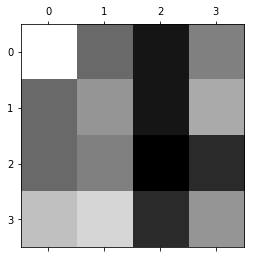

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_test, y_predict)
plt.matshow(cm, cmap = 'gray')

## Testing on team's speech data

In [77]:
test_data = pd.read_csv('namedtest.csv')
test_data.head()

,Person,Tone,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,67,1,143,143,143,143,143,143,143,143,48,48
1,67,1,137,137,137,137,255,137,137,137,137,0
2,67,2,0,0,41,81,81,81,0,122,122,122
3,67,2,89,89,255,255,255,255,255,222,89,89
4,67,3,117,0,0,0,78,78,255,0,0,0


In [82]:
test_charlie = test_data.loc[test_data['Person']==67]
test_dave = test_data.loc[test_data['Person']==68]
test_elena = test_data.loc[test_data['Person']==69]

#drop person columns
test_charlie = test_charlie.drop(columns = ['Person'])
test_dave = test_dave.drop(columns = ['Person'])
test_elena = test_elena.drop(columns = ['Person'])
test_charlie.head()

,Tone,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,1,143,143,143,143,143,143,143,143,48,48
1,1,137,137,137,137,255,137,137,137,137,0
2,2,0,0,41,81,81,81,0,122,122,122
3,2,89,89,255,255,255,255,255,222,89,89
4,3,117,0,0,0,78,78,255,0,0,0


## Charlie's data

Accuracy score: 0.0


C:\Users\ElenaRas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


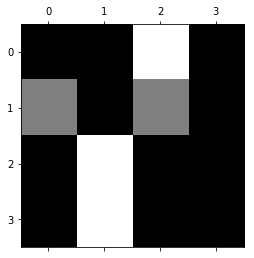

In [83]:
y_test = test_charlie["Tone"]
X_test_data = test_charlie.drop(columns = ['Tone'])
X_test_data.head()
X_test = X_test_data.as_matrix()

# fit model to data:
rbf_kernel_svm.fit(X, y)

# make predictions on team's speech data
y_predict = rbf_kernel_svm.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.matshow(cm, cmap = 'gray')

## Dave's data

Accuracy score: 0.555555555556


C:\Users\ElenaRas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


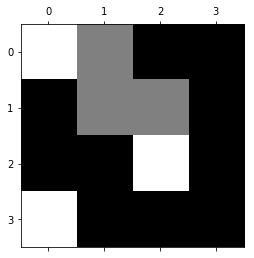

In [85]:
y_test = test_dave["Tone"]
X_test_data = test_dave.drop(columns = ['Tone'])
X_test_data.head()
X_test = X_test_data.as_matrix()

# fit model to data:
rbf_kernel_svm.fit(X, y)

# make predictions on team's speech data
y_predict = rbf_kernel_svm.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.matshow(cm, cmap = 'gray')

## Elena's data

Accuracy score: 0.25


C:\Users\ElenaRas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


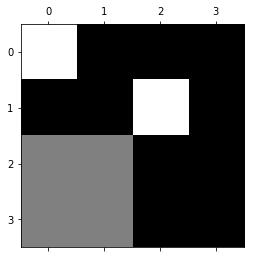

In [86]:
y_test = test_elena["Tone"]
X_test_data = test_elena.drop(columns = ['Tone'])
X_test_data.head()
X_test = X_test_data.as_matrix()

# fit model to data:
rbf_kernel_svm.fit(X, y)

# make predictions on team's speech data
y_predict = rbf_kernel_svm.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.matshow(cm, cmap = 'gray')